In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [5]:
import json
data_file_path ="C:\\Users\\DELL\\OneDrive\\Documents\\Vino_WIP\\Weather_Prediction\\data\\raw_data.json"

with open(data_file_path, "r") as json_file:
    json_content = json_file.read()

json_data = json.loads(json_content)



In [6]:
json_data

{'latitude': 22.300003,
 'longitude': 78.80002,
 'generationtime_ms': 27.341008186340332,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 961.0,
 'hourly_units': {'time': 'iso8601',
  'temperature_2m': '°C',
  'relativehumidity_2m': '%',
  'precipitation': 'mm',
  'weathercode': 'wmo code',
  'windspeed_10m': 'km/h',
  'winddirection_10m': '°'},
 'hourly': {'time': ['2022-01-01T00:00',
   '2022-01-01T01:00',
   '2022-01-01T02:00',
   '2022-01-01T03:00',
   '2022-01-01T04:00',
   '2022-01-01T05:00',
   '2022-01-01T06:00',
   '2022-01-01T07:00',
   '2022-01-01T08:00',
   '2022-01-01T09:00',
   '2022-01-01T10:00',
   '2022-01-01T11:00',
   '2022-01-01T12:00',
   '2022-01-01T13:00',
   '2022-01-01T14:00',
   '2022-01-01T15:00',
   '2022-01-01T16:00',
   '2022-01-01T17:00',
   '2022-01-01T18:00',
   '2022-01-01T19:00',
   '2022-01-01T20:00',
   '2022-01-01T21:00',
   '2022-01-01T22:00',
   '2022-01-01T23:00',
   '2022-01-02T00:00',
   '2022-01-02

In [7]:
json_data=json.loads(json_content)
hourly_data=json_data['hourly']

In [8]:
df = pd.DataFrame(hourly_data)


In [9]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [10]:
df.columns


Index(['time', 'temperature_2m', 'relativehumidity_2m', 'precipitation',
       'weathercode', 'windspeed_10m', 'winddirection_10m'],
      dtype='object')

In [11]:
df.head()

,time,temperature_2m,relativehumidity_2m,precipitation,weathercode,windspeed_10m,winddirection_10m
0,2022-01-01T00:00,9.4,91,0.0,0,8.2,29
1,2022-01-01T01:00,9.4,90,0.0,0,8.0,27
2,2022-01-01T02:00,10.0,88,0.0,0,8.2,23
3,2022-01-01T03:00,13.3,82,0.0,0,8.0,18
4,2022-01-01T04:00,16.8,70,0.0,0,7.3,11


In [12]:
column_units_mapping={'temperature_2m': 'temperature_2m (°C)',
  'relativehumidity_2m': 'relativehumidity_2m (%)',
  'precipitation': 'precipitation (mm)',
  'weathercode': 'weathercode (wmo code)',
  'cloudcover': 'cloudcover (%)',
  'windspeed_10m': 'windspeed_10m (km/h)',
  'winddirection_10m': 'winddirection_10m (°)'}

In [13]:
df=df.rename(columns=column_units_mapping)

In [14]:
df.head()

,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),weathercode (wmo code),windspeed_10m (km/h),winddirection_10m (°)
0,2022-01-01T00:00,9.4,91,0.0,0,8.2,29
1,2022-01-01T01:00,9.4,90,0.0,0,8.0,27
2,2022-01-01T02:00,10.0,88,0.0,0,8.2,23
3,2022-01-01T03:00,13.3,82,0.0,0,8.0,18
4,2022-01-01T04:00,16.8,70,0.0,0,7.3,11


In [15]:
df.shape

(13968, 7)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13968 entries, 0 to 13967
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   time                     13968 non-null  object 
 1   temperature_2m (°C)      13968 non-null  float64
 2   relativehumidity_2m (%)  13968 non-null  int64  
 3   precipitation (mm)       13968 non-null  float64
 4   weathercode (wmo code)   13968 non-null  int64  
 5   windspeed_10m (km/h)     13968 non-null  float64
 6   winddirection_10m (°)    13968 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 764.0+ KB


In [17]:
df.describe()

,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),weathercode (wmo code),windspeed_10m (km/h),winddirection_10m (°)
count,13968.000000,13968.000000,13968.000000,13968.000000,13968.000000,13968.000000
mean,22.874749,58.674112,0.213989,12.098010,8.534837,175.248855
std,5.890823,26.330894,0.813934,22.238717,4.138376,102.033970
min,4.700000,10.000000,0.000000,0.000000,0.000000,2.000000
25%,19.600000,36.000000,0.000000,0.000000,5.800000,84.000000
50%,22.600000,57.000000,0.000000,0.000000,7.900000,167.000000
75%,26.200000,84.000000,0.000000,3.000000,10.500000,272.000000
max,38.400000,100.000000,11.500000,65.000000,31.300000,360.000000


In [18]:
#checking for null values
df.isnull().sum()

time                       0
temperature_2m (°C)        0
relativehumidity_2m (%)    0
precipitation (mm)         0
weathercode (wmo code)     0
windspeed_10m (km/h)       0
winddirection_10m (°)      0
dtype: int64

In [19]:
rows_with_nulls = df[df.isnull().any(axis=1)]

In [20]:
rows_with_nulls

,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),weathercode (wmo code),windspeed_10m (km/h),winddirection_10m (°)


In [21]:
# since we dont have the datas from 05-08-2023, so we are removing
df.dropna(inplace=True)

In [22]:
df.isnull().sum()

time                       0
temperature_2m (°C)        0
relativehumidity_2m (%)    0
precipitation (mm)         0
weathercode (wmo code)     0
windspeed_10m (km/h)       0
winddirection_10m (°)      0
dtype: int64

In [23]:
df.shape

(13968, 7)

In [89]:
df.describe()

,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),weathercode (wmo code),windspeed_10m (km/h),winddirection_10m (°),Month
count,13968.000000,13968.000000,13968.000000,13968.000000,13968.000000,13968.000000,13968.00000
mean,22.874749,58.674112,0.213989,12.098010,8.534837,175.248855,5.62543
std,5.890823,26.330894,0.813934,22.238717,4.138376,102.033970,3.22756
min,4.700000,10.000000,0.000000,0.000000,0.000000,2.000000,1.00000
25%,19.600000,36.000000,0.000000,0.000000,5.800000,84.000000,3.00000
50%,22.600000,57.000000,0.000000,0.000000,7.900000,167.000000,5.00000
75%,26.200000,84.000000,0.000000,3.000000,10.500000,272.000000,8.00000
max,38.400000,100.000000,11.500000,65.000000,31.300000,360.000000,12.00000


In [24]:
#Check for the duplicates
df.duplicated().sum()

0

In [25]:
columns_to_check = df.columns.to_list()
     

In [26]:
columns_to_check.remove('time')

In [27]:
type(columns_to_check)

list

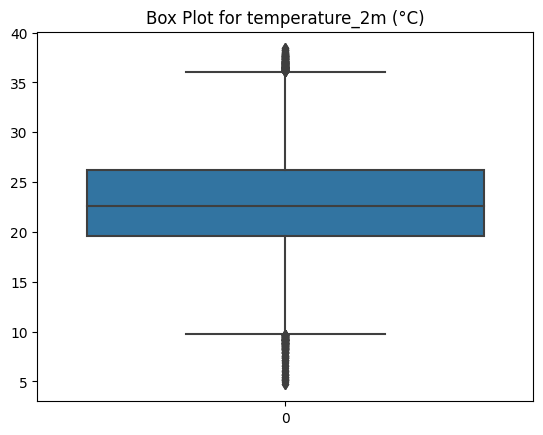

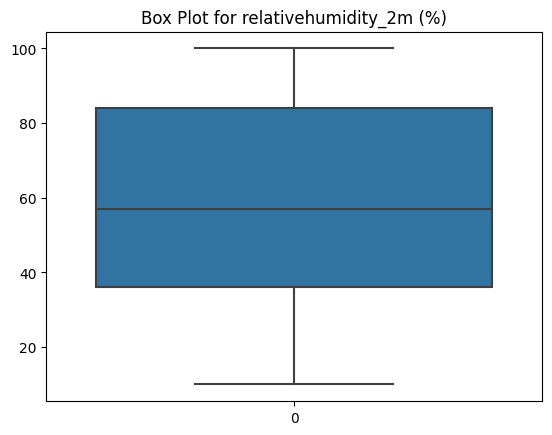

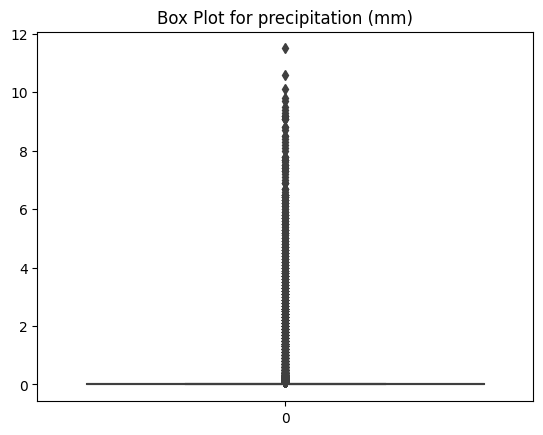

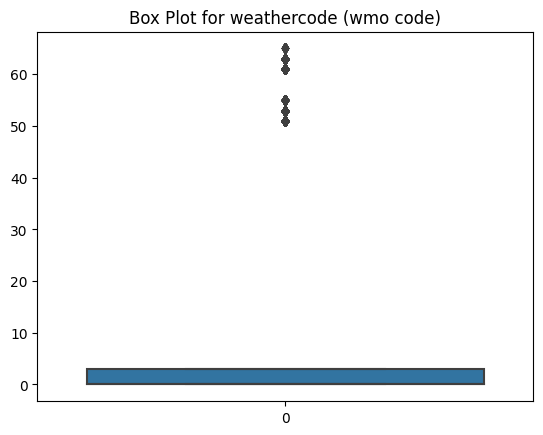

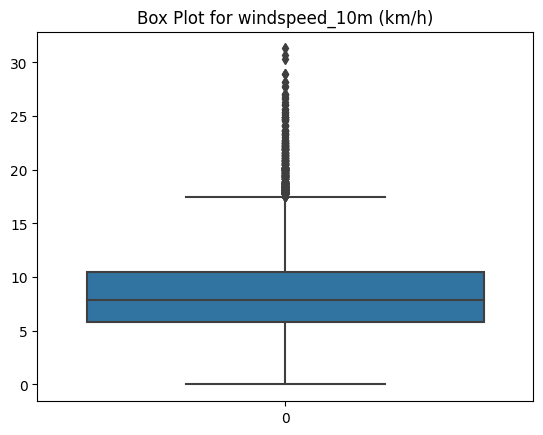

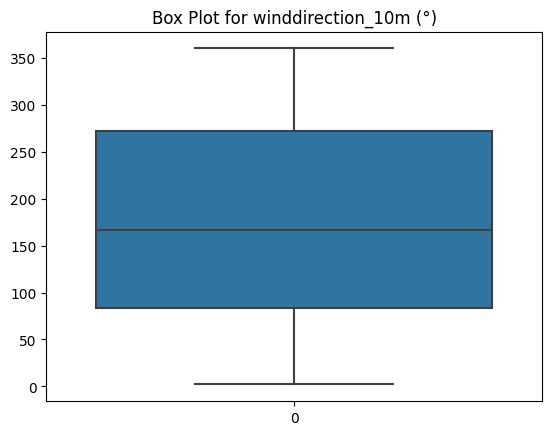

In [28]:
for column in columns_to_check:
    sns.boxplot(df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()


In [29]:

# Calculate the IQR for each numeric column
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
potential_outliers = ((df[columns_to_check] < Q1 - threshold * IQR) | (df[columns_to_check] > Q3 + threshold * IQR))
outliers_count = potential_outliers.sum()
print(outliers_count)


temperature_2m (°C)         348
relativehumidity_2m (%)       0
precipitation (mm)         3035
weathercode (wmo code)     3035
windspeed_10m (km/h)        502
winddirection_10m (°)         0
dtype: int64


In [30]:
df[potential_outliers['temperature_2m (°C)']].head()

,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),weathercode (wmo code),windspeed_10m (km/h),winddirection_10m (°)
0,2022-01-01T00:00,9.4,91,0.0,0,8.2,29
1,2022-01-01T01:00,9.4,90,0.0,0,8.0,27
47,2022-01-02T23:00,9.7,90,0.0,0,6.6,41
48,2022-01-03T00:00,9.3,90,0.0,0,6.8,32
49,2022-01-03T01:00,9.2,89,0.0,0,7.1,30


In [31]:
# precipitation and weather code have more outliers 

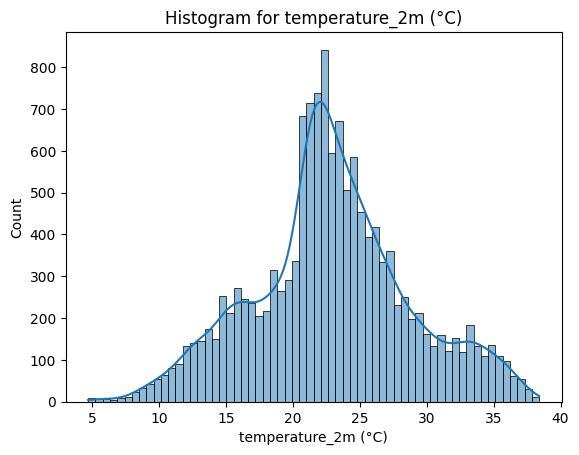

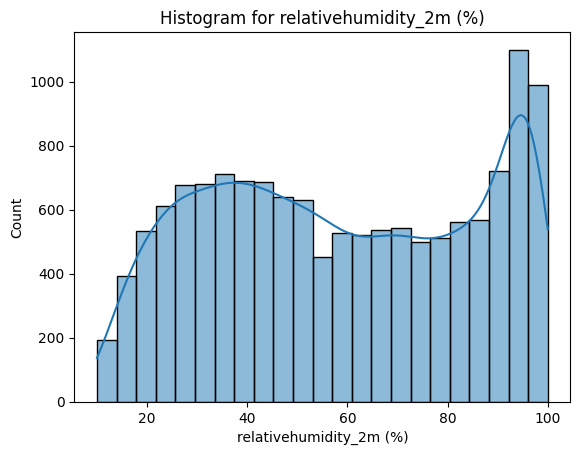

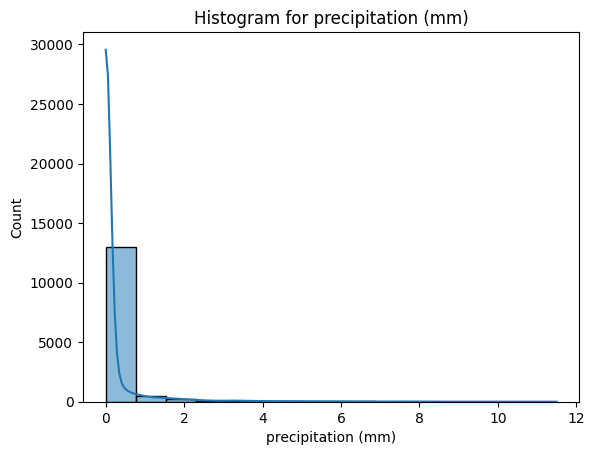

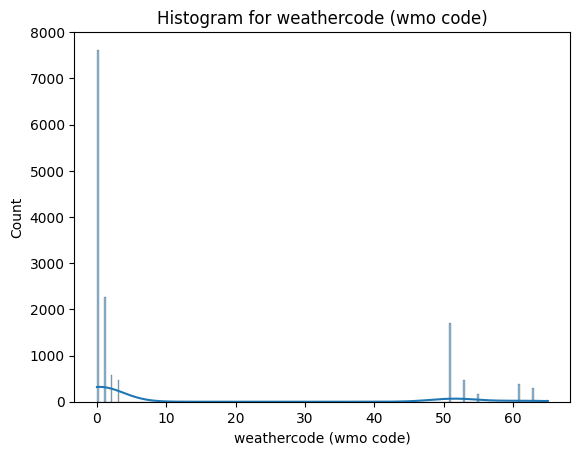

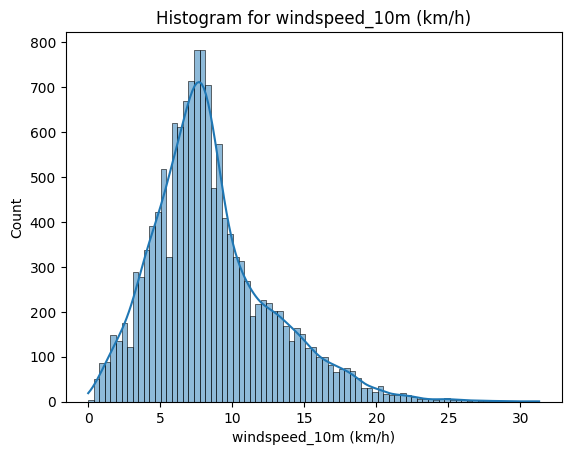

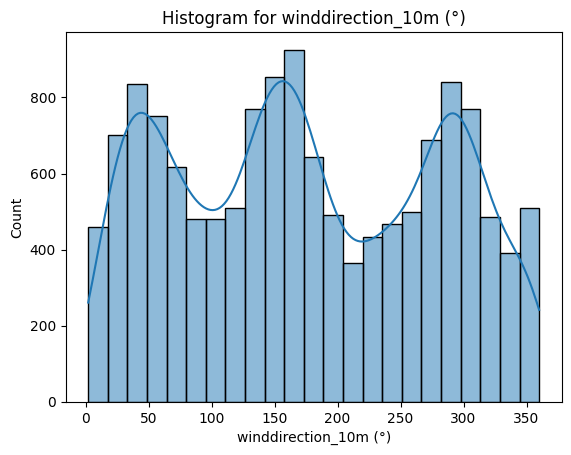

In [32]:
#Univariate analysis
for column in columns_to_check:
    sns.histplot(df[column],kde=True)
    plt.title(f'Histogram for {column}')
    plt.show()

In [33]:
df.head()

,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),weathercode (wmo code),windspeed_10m (km/h),winddirection_10m (°)
0,2022-01-01T00:00,9.4,91,0.0,0,8.2,29
1,2022-01-01T01:00,9.4,90,0.0,0,8.0,27
2,2022-01-01T02:00,10.0,88,0.0,0,8.2,23
3,2022-01-01T03:00,13.3,82,0.0,0,8.0,18
4,2022-01-01T04:00,16.8,70,0.0,0,7.3,11


In [34]:
df.dtypes

time                        object
temperature_2m (°C)        float64
relativehumidity_2m (%)      int64
precipitation (mm)         float64
weathercode (wmo code)       int64
windspeed_10m (km/h)       float64
winddirection_10m (°)        int64
dtype: object

In [35]:
from datetime import datetime as dt

In [36]:
# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%dT%H:%M')

In [37]:
df.head()

,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),weathercode (wmo code),windspeed_10m (km/h),winddirection_10m (°)
0,2022-01-01 00:00:00,9.4,91,0.0,0,8.2,29
1,2022-01-01 01:00:00,9.4,90,0.0,0,8.0,27
2,2022-01-01 02:00:00,10.0,88,0.0,0,8.2,23
3,2022-01-01 03:00:00,13.3,82,0.0,0,8.0,18
4,2022-01-01 04:00:00,16.8,70,0.0,0,7.3,11


In [38]:
df['Month']=df['time'].dt.month

In [39]:
df.head()

,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),weathercode (wmo code),windspeed_10m (km/h),winddirection_10m (°),Month
0,2022-01-01 00:00:00,9.4,91,0.0,0,8.2,29,1
1,2022-01-01 01:00:00,9.4,90,0.0,0,8.0,27,1
2,2022-01-01 02:00:00,10.0,88,0.0,0,8.2,23,1
3,2022-01-01 03:00:00,13.3,82,0.0,0,8.0,18,1
4,2022-01-01 04:00:00,16.8,70,0.0,0,7.3,11,1


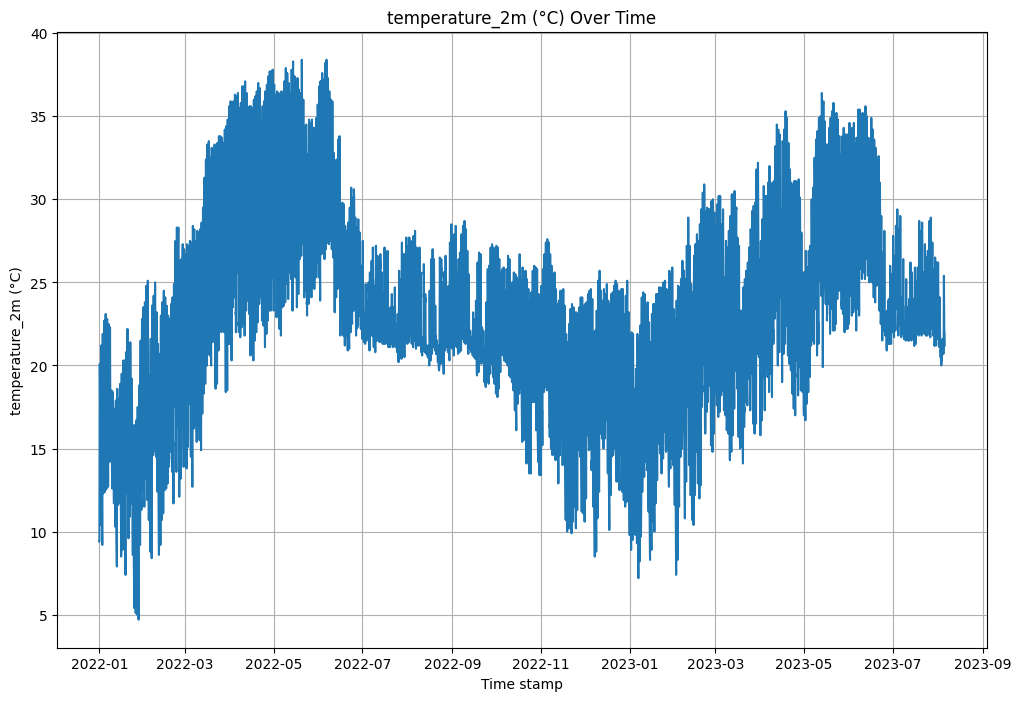

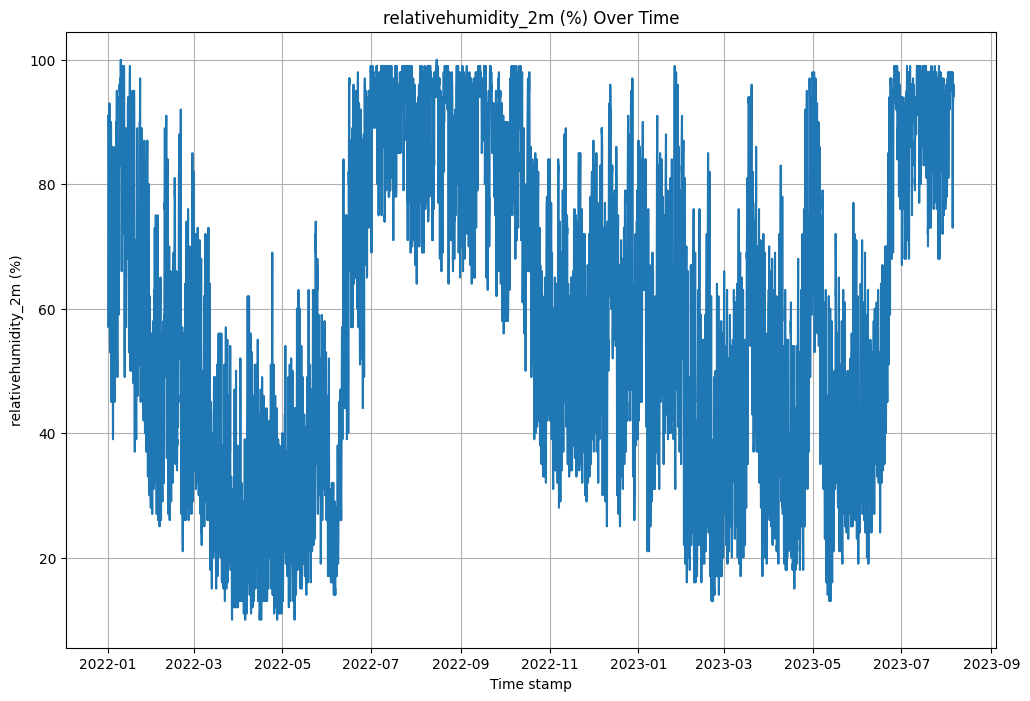

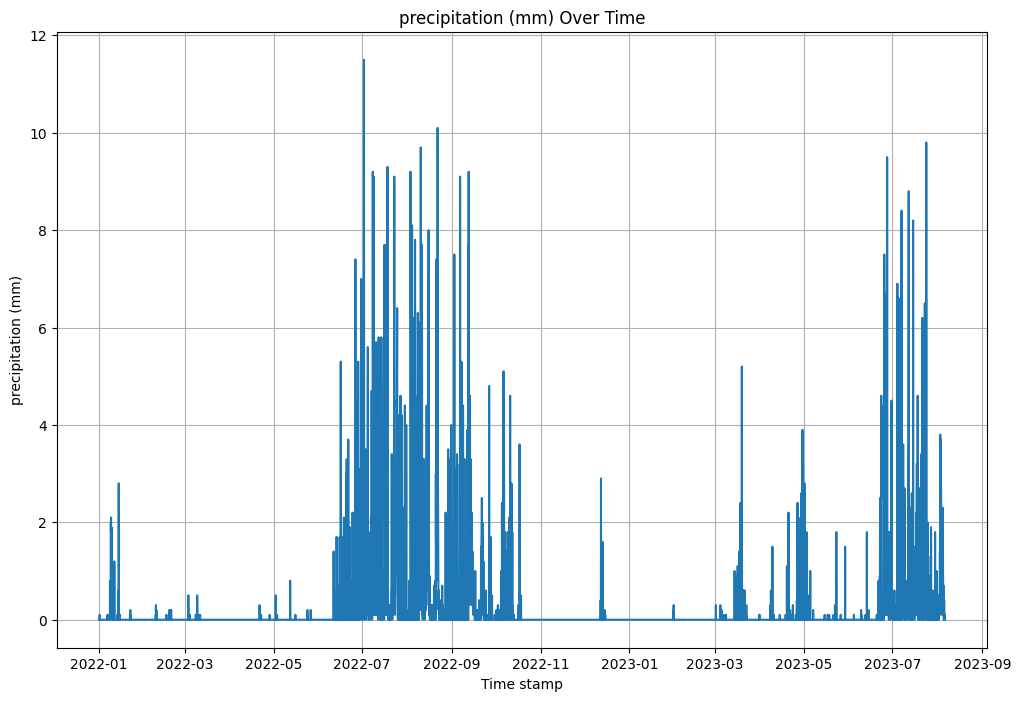

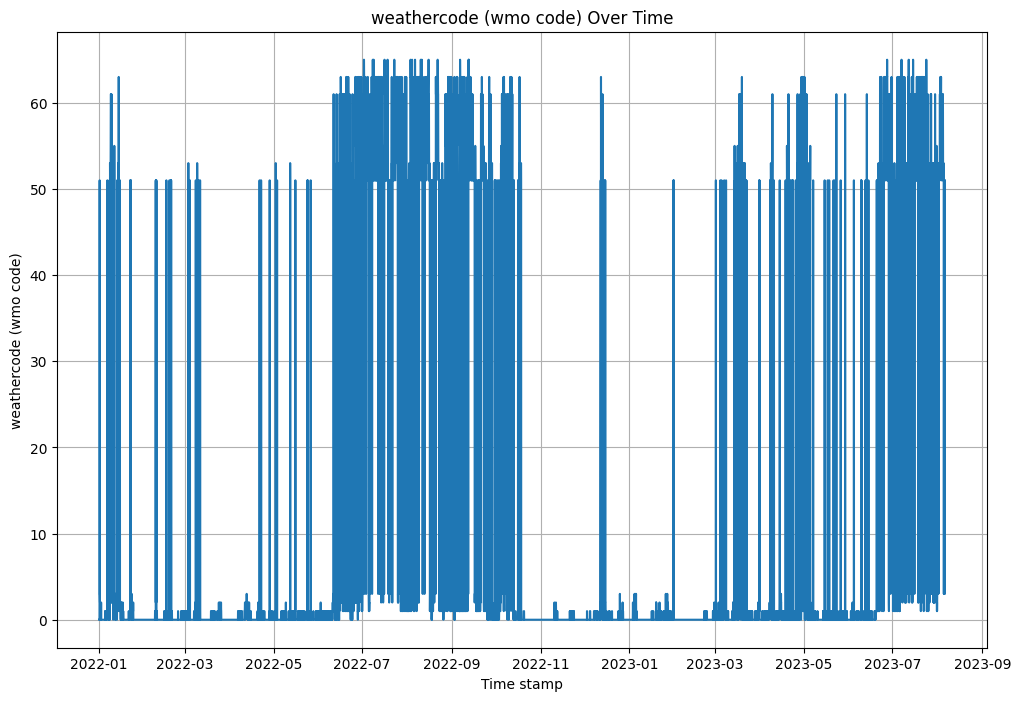

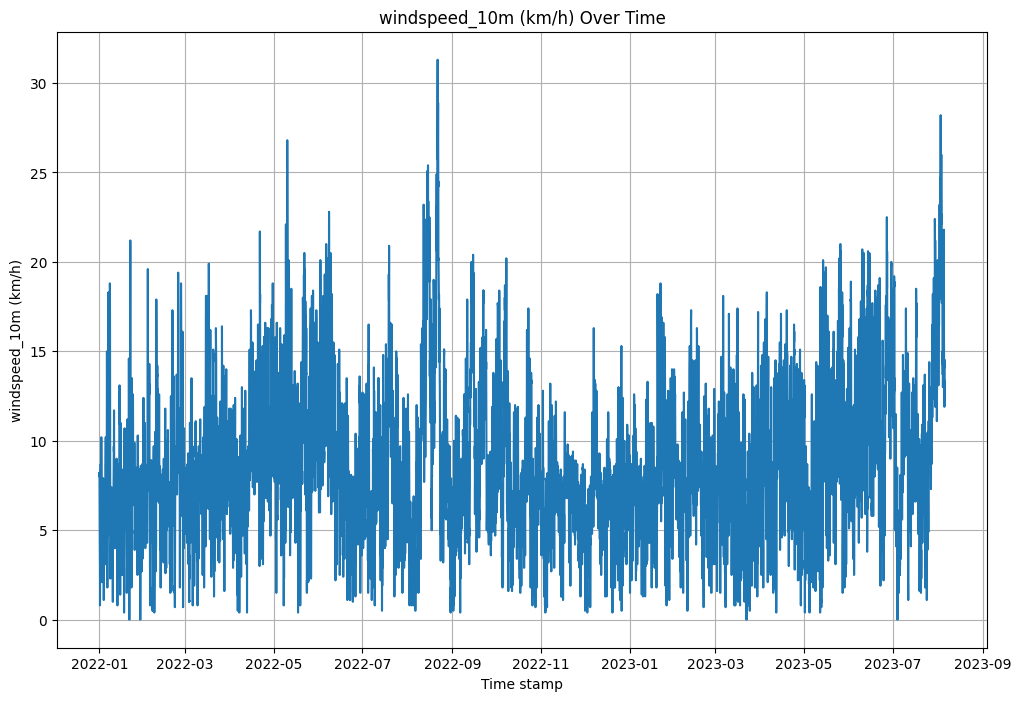

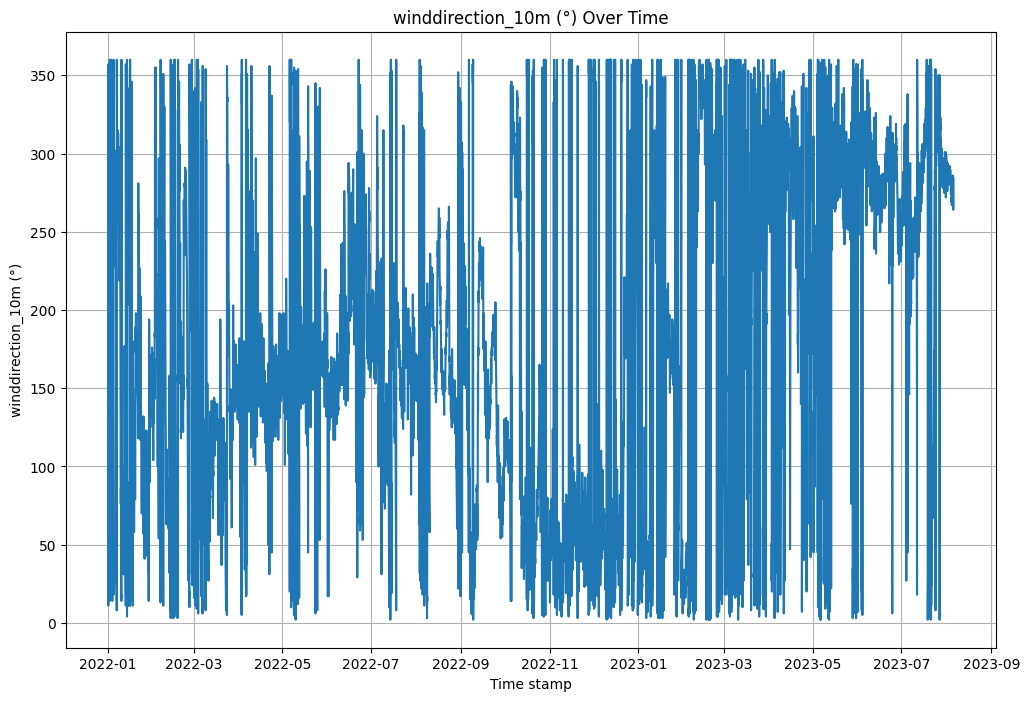

In [40]:

# Plot each feature against the timestamp
for column in columns_to_check:
    plt.figure(figsize=(12, 8))
    plt.plot(df['time'], df[column])
    plt.xlabel('Time stamp')
    plt.ylabel(column)
    plt.title(f'{column} Over Time')
    plt.grid(True)
    plt.show()

In [41]:
df.corr()

,time,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),weathercode (wmo code),windspeed_10m (km/h),winddirection_10m (°),Month
time,1.000000,0.060942,0.109666,0.034540,0.115510,0.092430,0.348317,0.203842
temperature_2m (°C),0.060942,1.000000,-0.542563,-0.001610,0.024488,0.313484,0.297720,0.006533
relativehumidity_2m (%),0.109666,-0.542563,1.000000,0.309877,0.551064,-0.072407,-0.052352,0.351991
precipitation (mm),0.034540,-0.001610,0.309877,1.000000,0.565794,0.111685,0.066514,0.131689
weathercode (wmo code),0.115510,0.024488,0.551064,0.565794,1.000000,0.180062,0.148747,0.243100
windspeed_10m (km/h),0.092430,0.313484,-0.072407,0.111685,0.180062,1.000000,0.149745,0.020124
winddirection_10m (°),0.348317,0.297720,-0.052352,0.066514,0.148747,0.149745,1.000000,-0.129787
Month,0.203842,0.006533,0.351991,0.131689,0.243100,0.020124,-0.129787,1.000000


<Axes: >

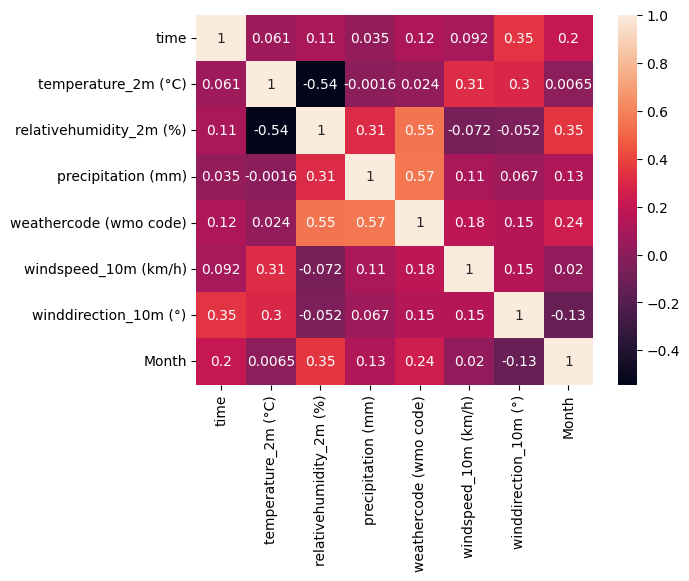

In [42]:
sns.heatmap(df.corr(),annot=True)

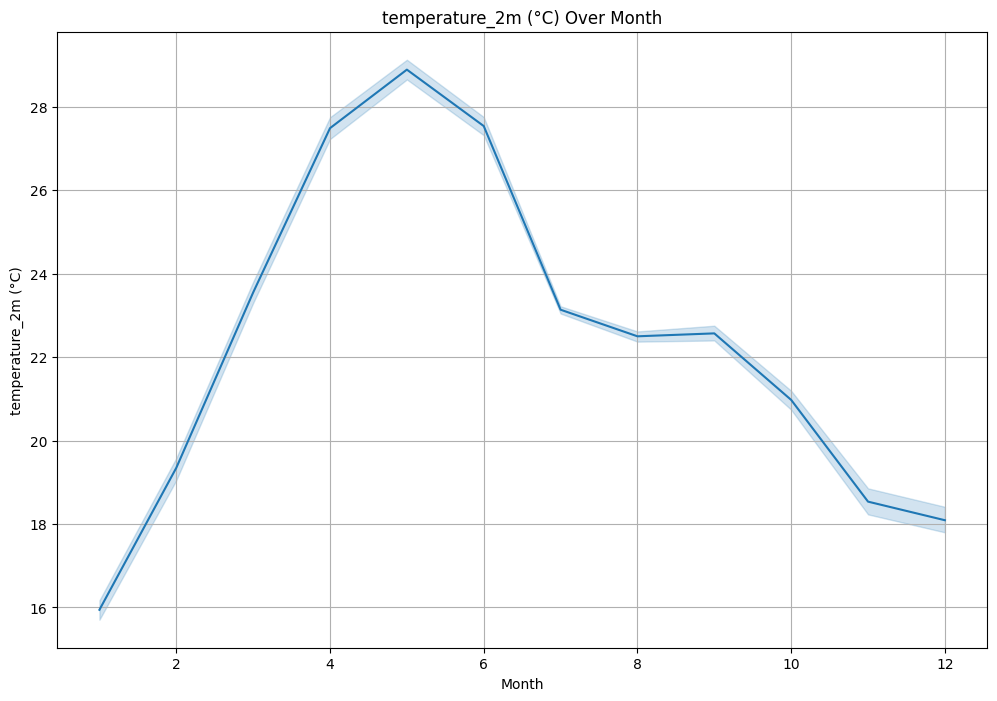

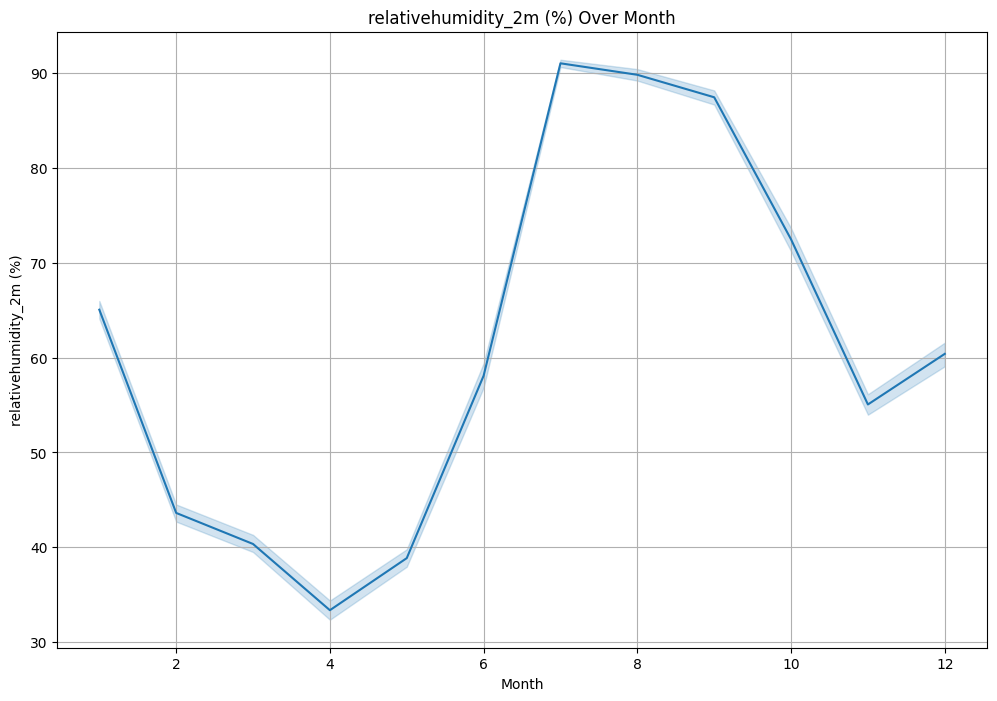

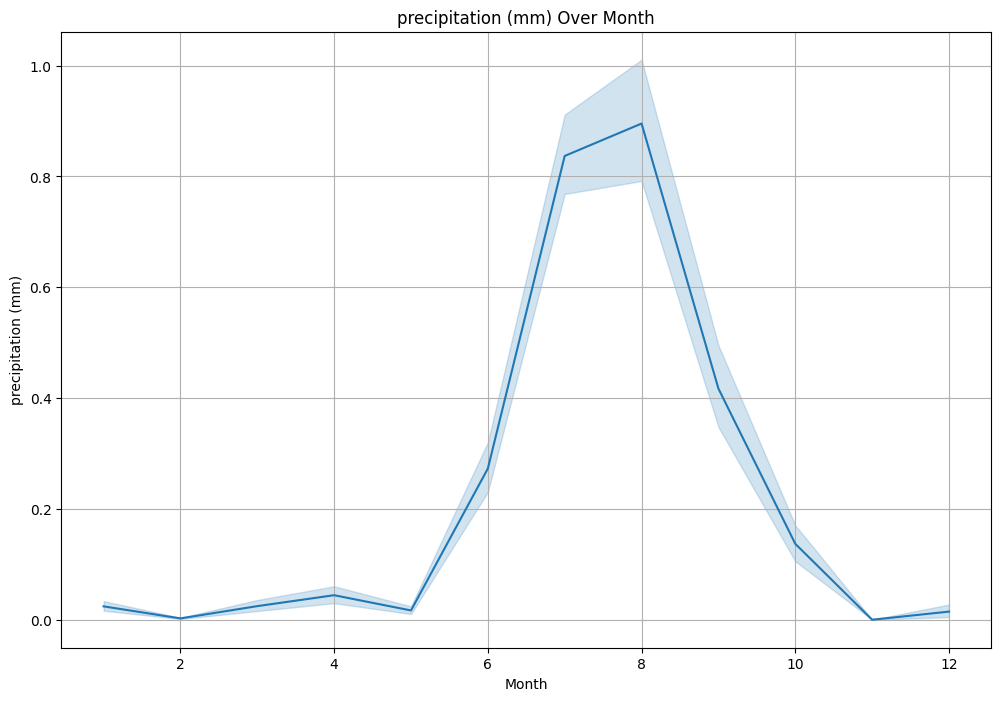

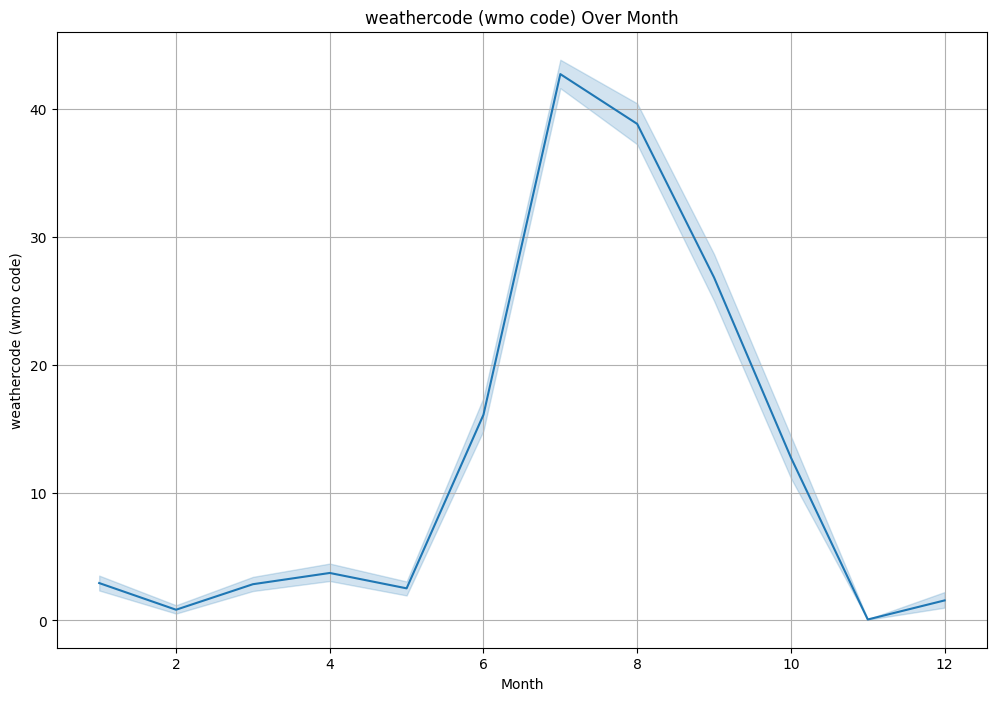

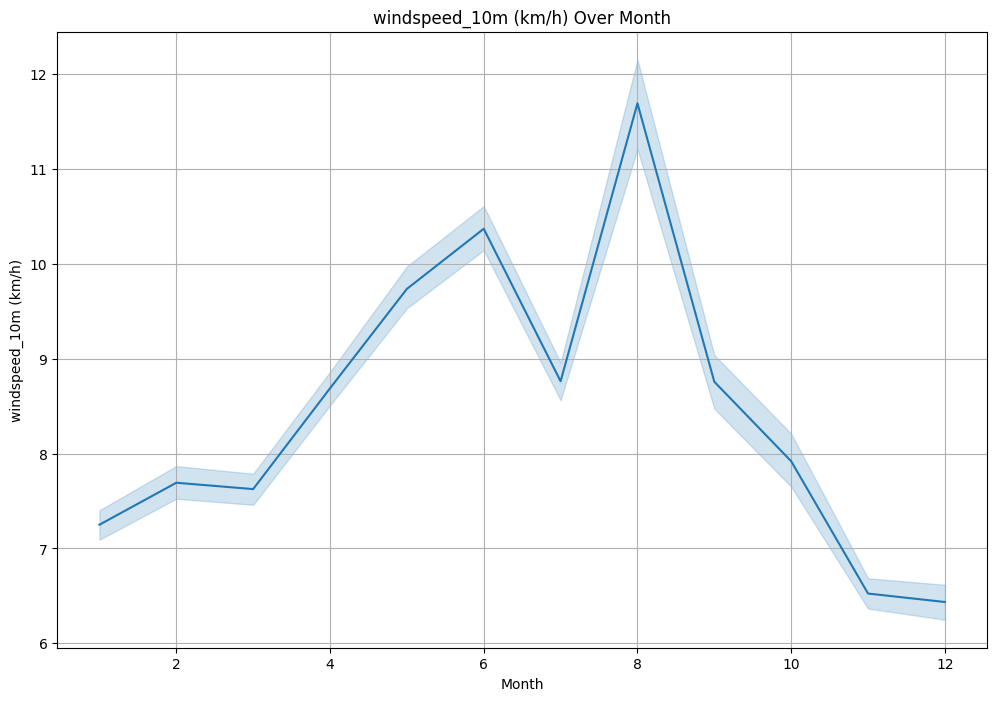

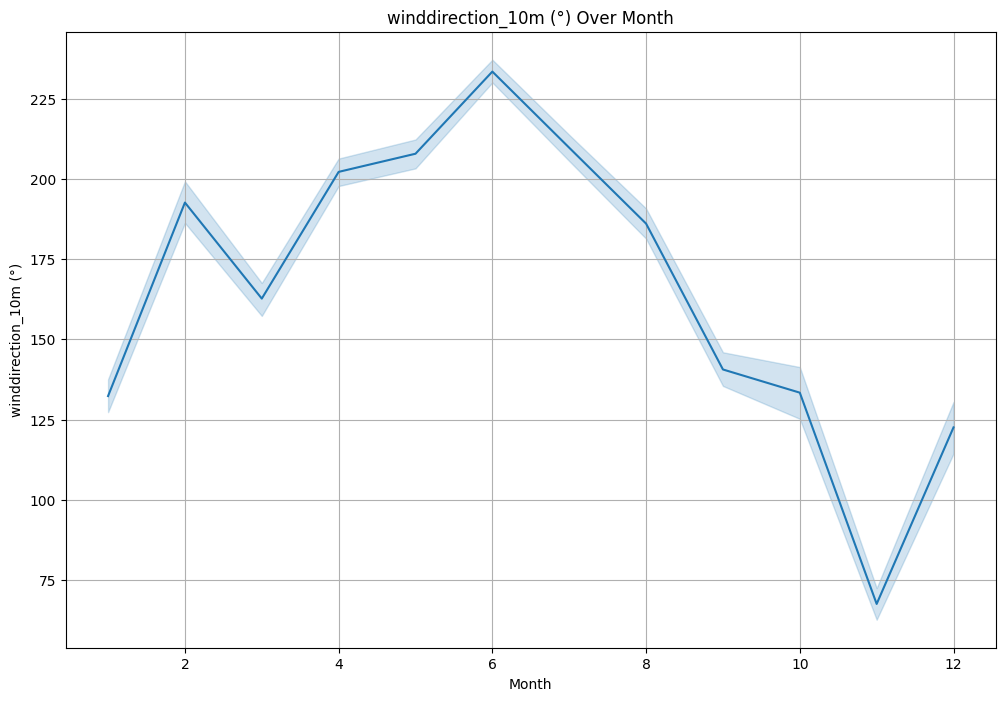

In [43]:
# Plot each feature against the timestamp
for column in columns_to_check:
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=df,x='Month',y= column)
    plt.xlabel('Month')
    plt.ylabel(column)
    plt.title(f'{column} Over Month')
    plt.grid(True)
    plt.show()

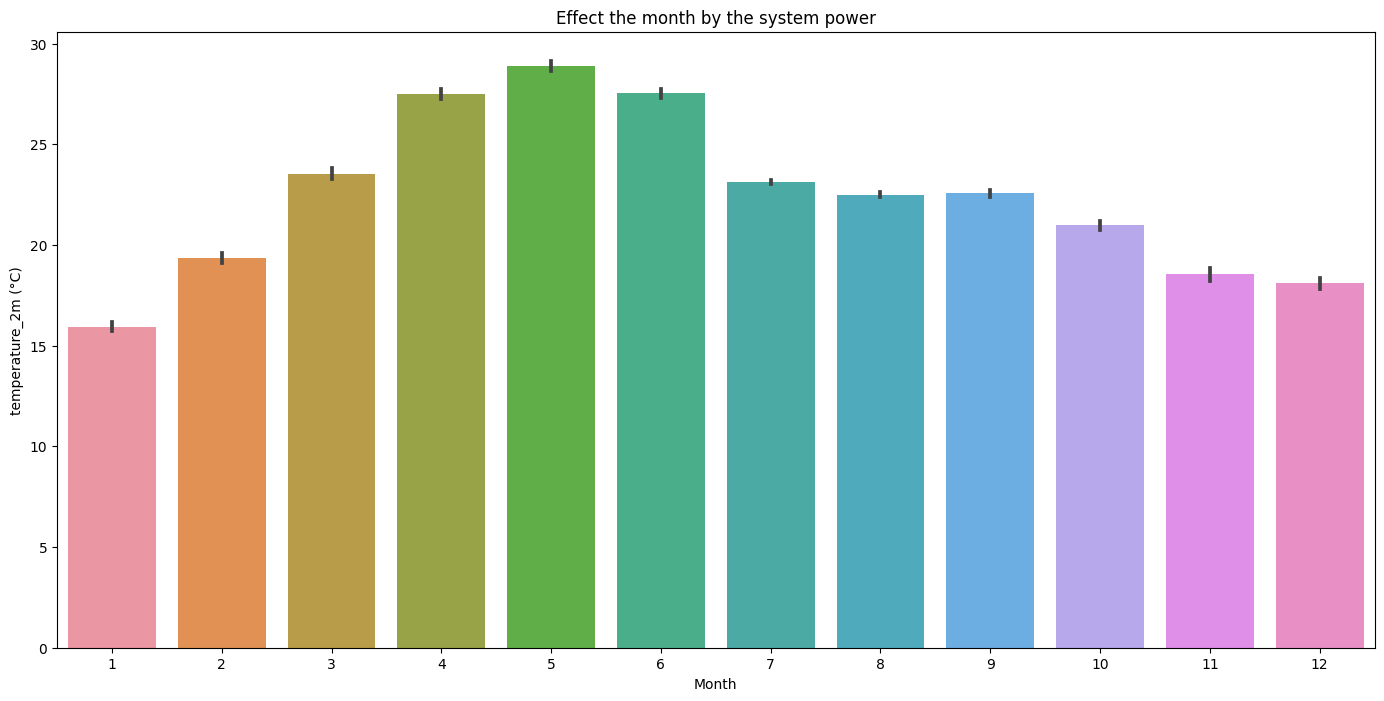

In [44]:
plt.figure(figsize=(17,8))
sns.barplot(data=df,x="Month",y="temperature_2m (°C)",)
plt.title("Effect the month by the system power")
plt.show()

In [45]:
# Set 'time' column as the index
df.set_index('time', inplace=True)

In [46]:
df.head()

,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),weathercode (wmo code),windspeed_10m (km/h),winddirection_10m (°),Month
time,,,,,,,
2022-01-01 00:00:00,9.4,91,0.0,0,8.2,29,1
2022-01-01 01:00:00,9.4,90,0.0,0,8.0,27,1
2022-01-01 02:00:00,10.0,88,0.0,0,8.2,23,1
2022-01-01 03:00:00,13.3,82,0.0,0,8.0,18,1
2022-01-01 04:00:00,16.8,70,0.0,0,7.3,11,1


In [47]:
np.mean(df['temperature_2m (°C)'])

22.874749427262312

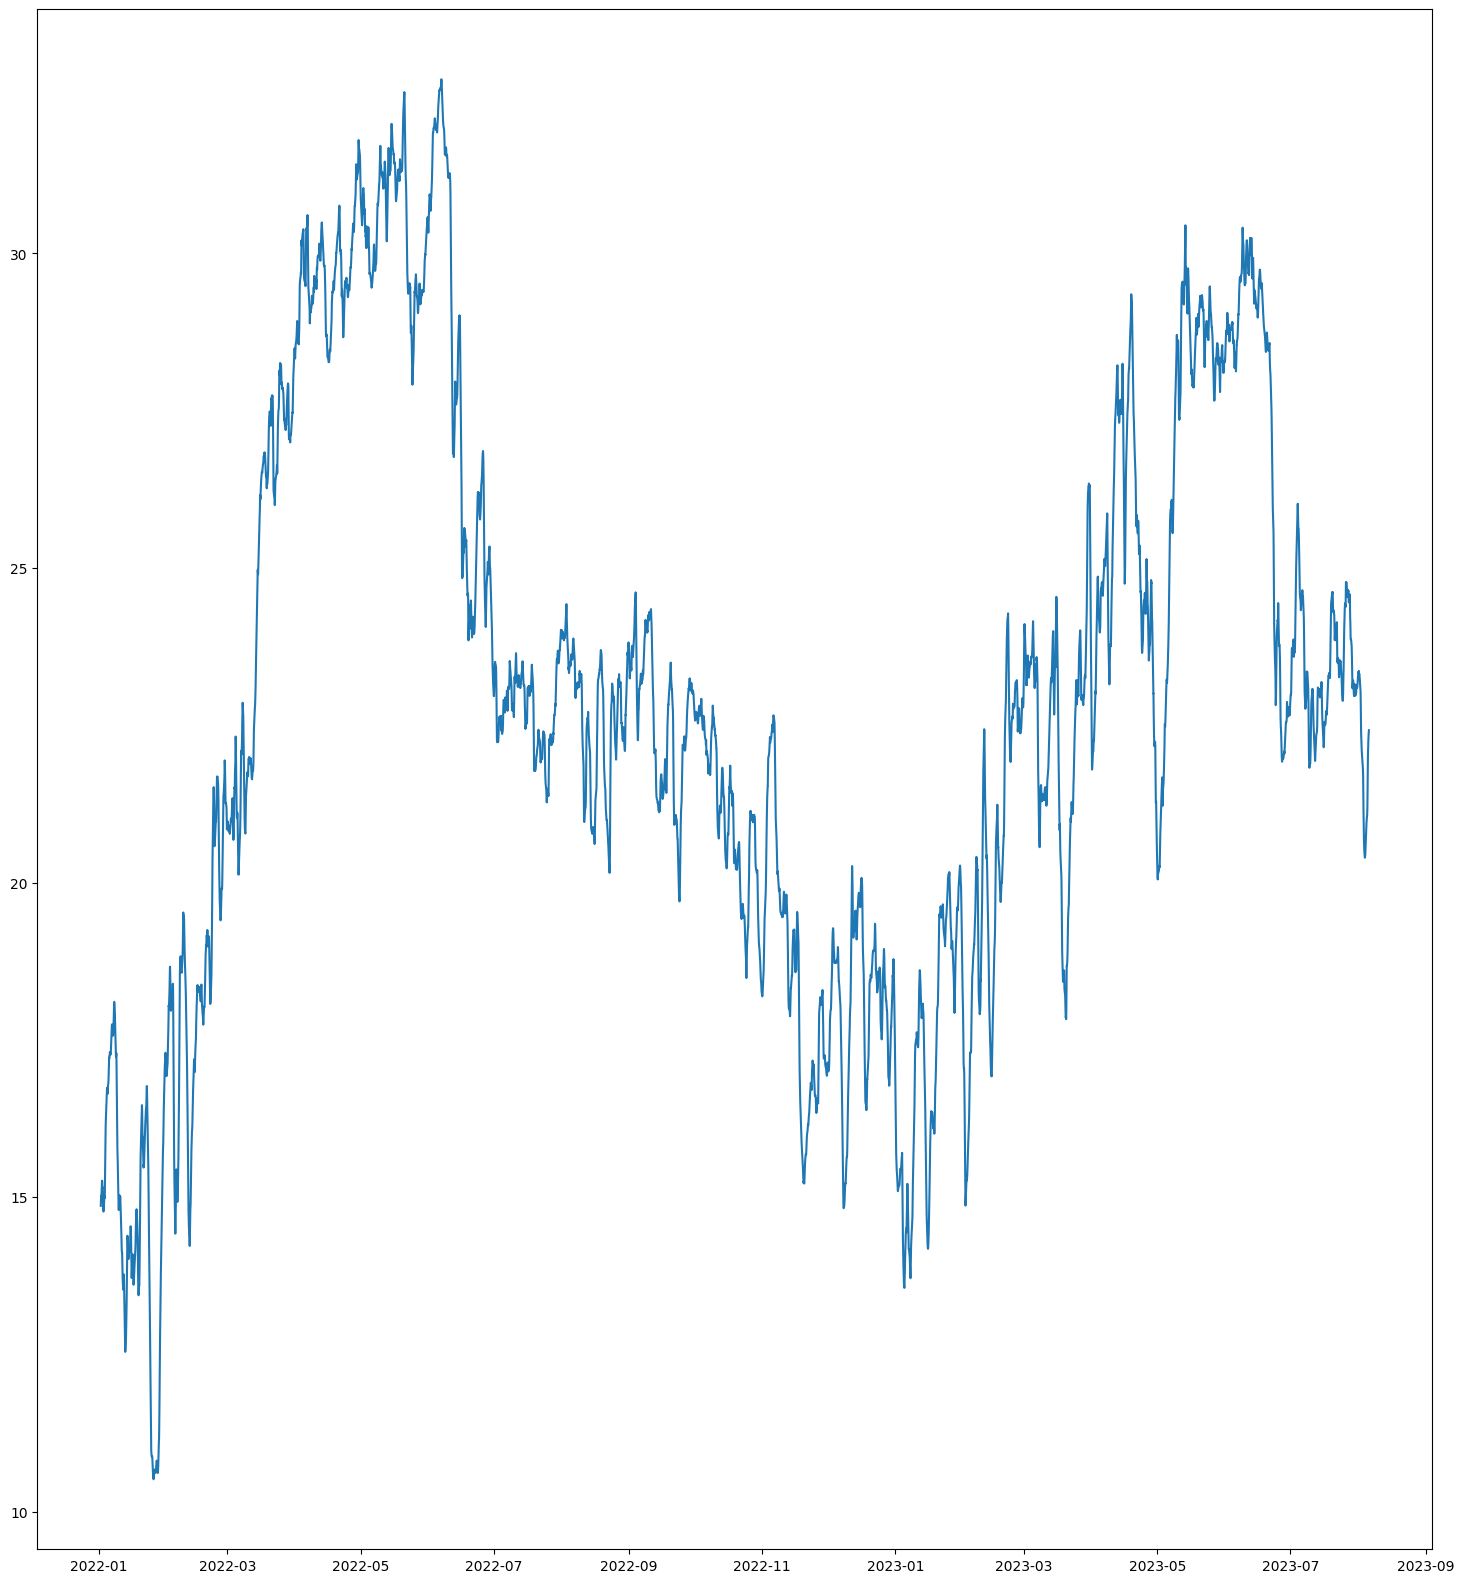

In [48]:
plt.figure(figsize=(18,20))
plt.plot(df['temperature_2m (°C)'].rolling(24).mean())

In [49]:
# Resample hourly data to daily frequency and calculate daily means
data = df.resample('D').mean()

In [50]:
data.head()

,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),weathercode (wmo code),windspeed_10m (km/h),winddirection_10m (°),Month
time,,,,,,,
2022-01-01,14.862500,77.500000,0.008333,5.166667,6.208333,105.541667,1.0
2022-01-02,14.995833,74.541667,0.000000,0.291667,6.508333,92.250000,1.0
2022-01-03,15.466667,67.041667,0.000000,0.000000,5.675000,85.666667,1.0
2022-01-04,16.687500,60.875000,0.000000,0.000000,4.775000,171.583333,1.0
2022-01-05,17.250000,67.750000,0.000000,0.416667,6.791667,265.000000,1.0


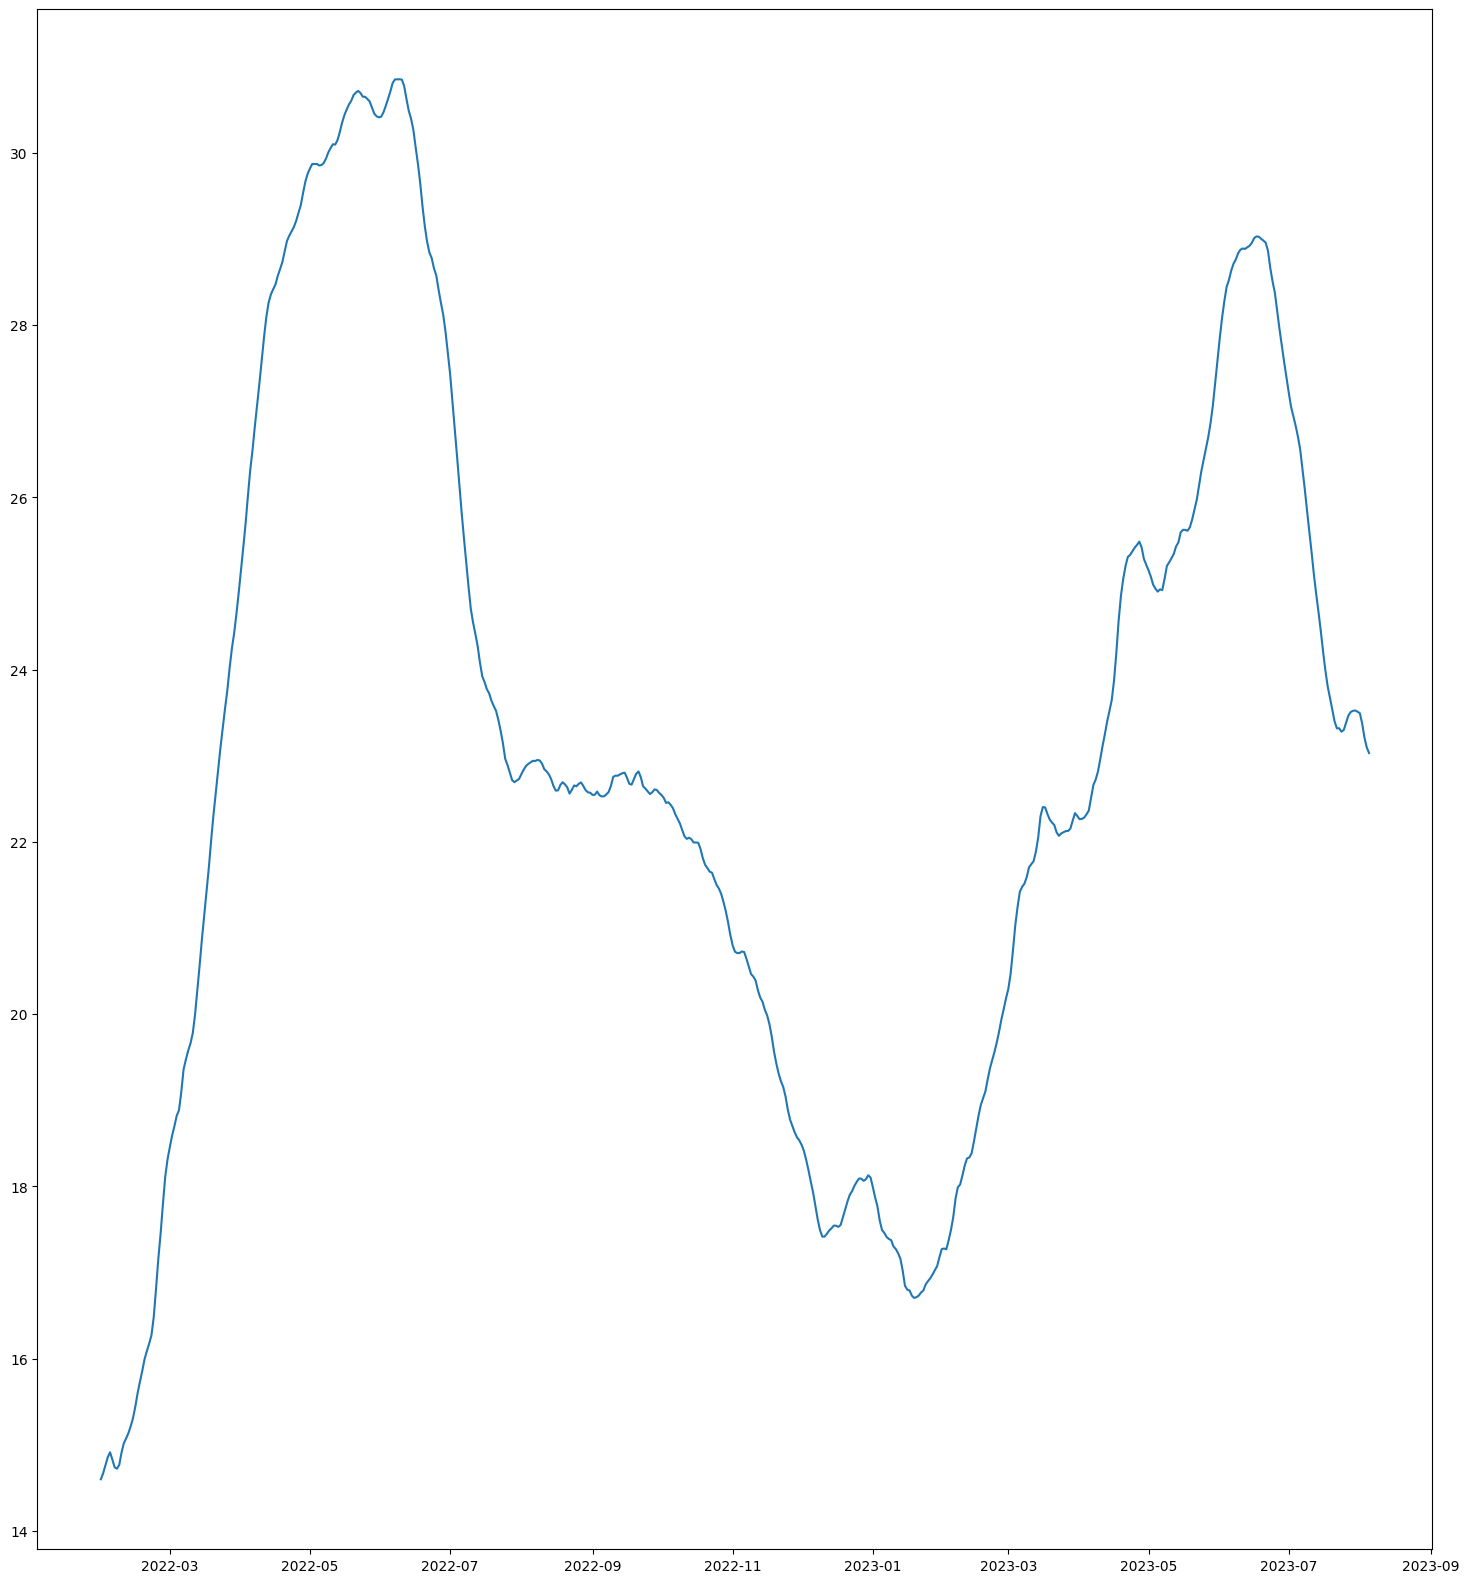

In [51]:
plt.figure(figsize=(18,20))
plt.plot(data['temperature_2m (°C)'].rolling(30).mean())

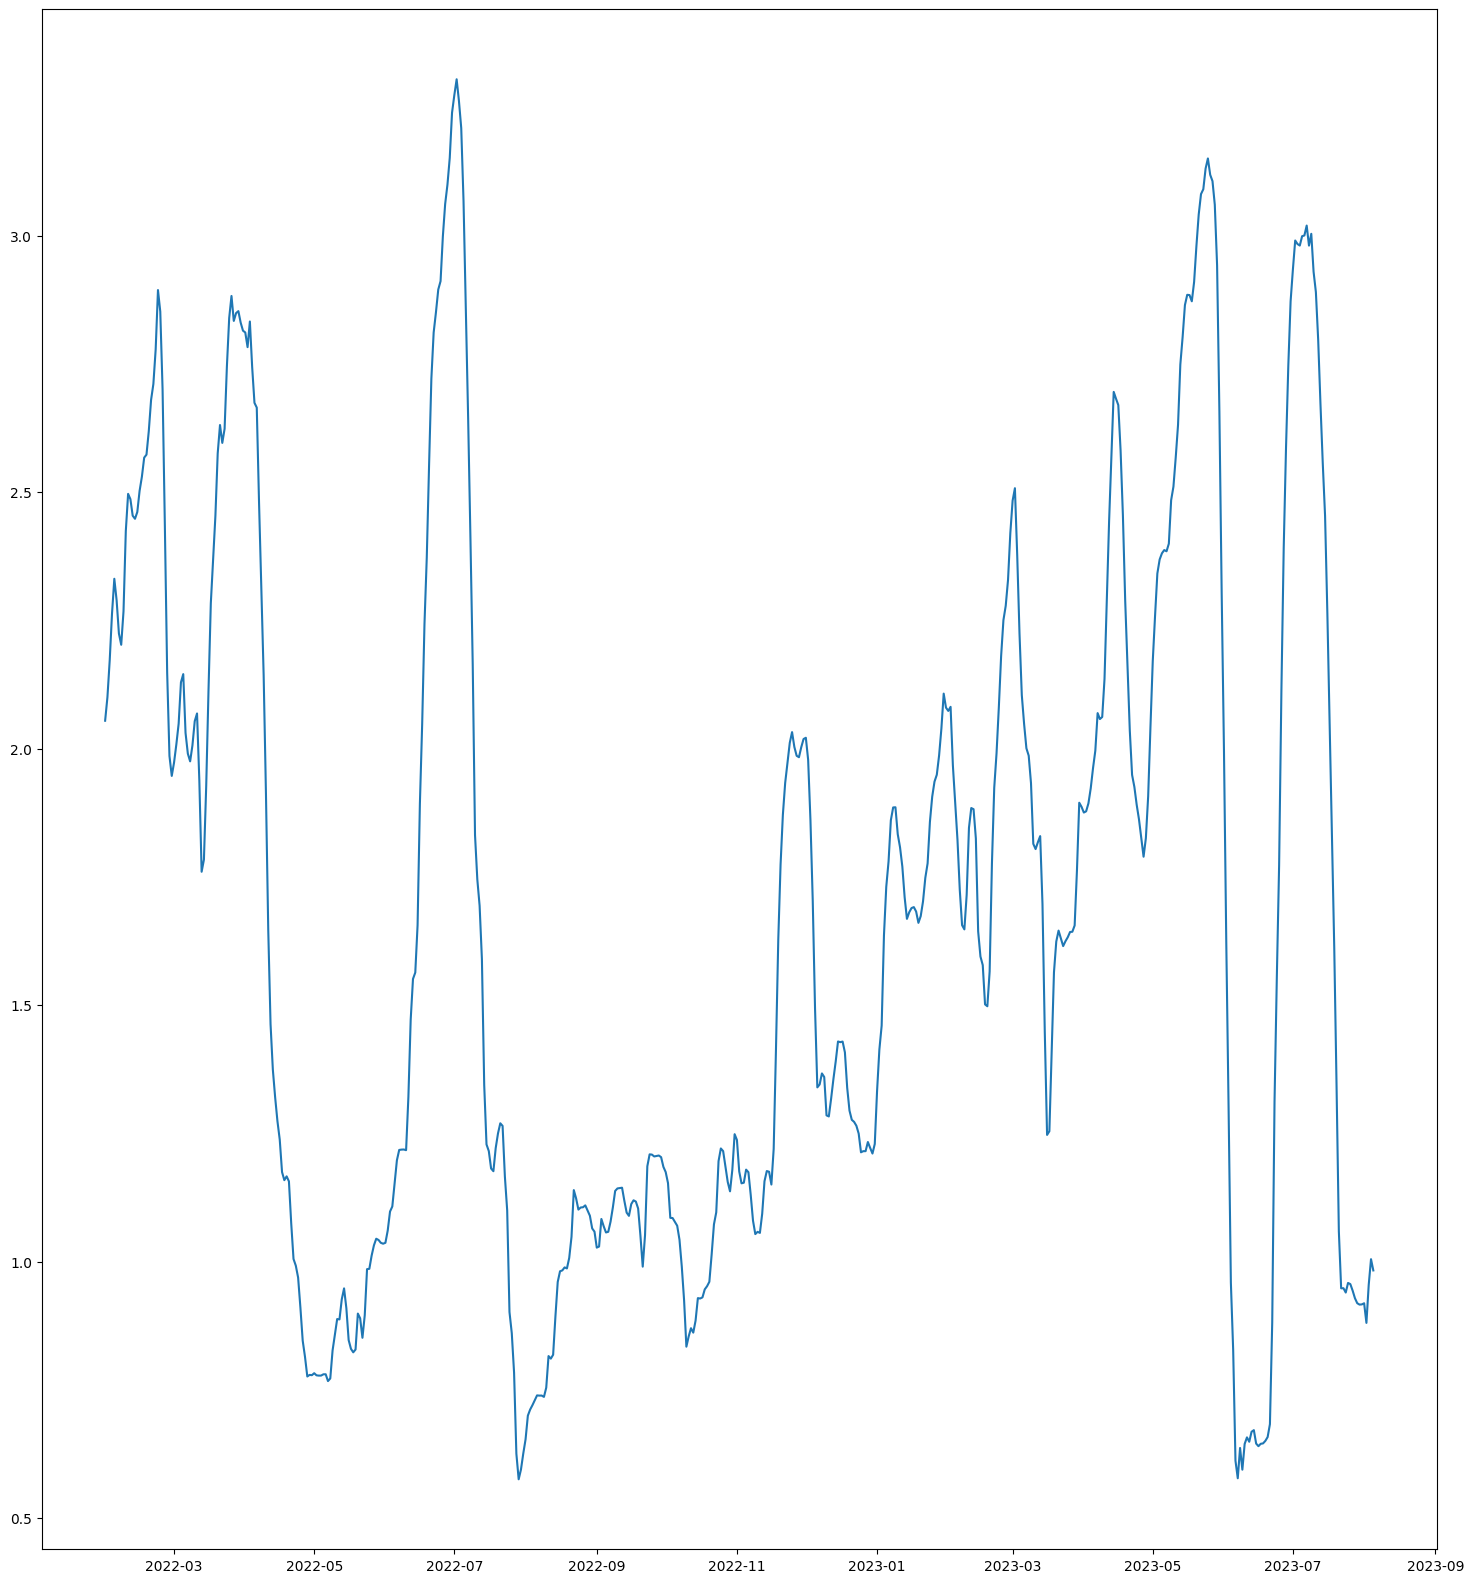

In [52]:
plt.figure(figsize=(18,20))
plt.plot(data['temperature_2m (°C)'].rolling(30).std())

In [53]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [54]:
from statsmodels.tsa.stattools import adfuller

In [55]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() # rolling mean
    rolstd = timeseries.rolling(12).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

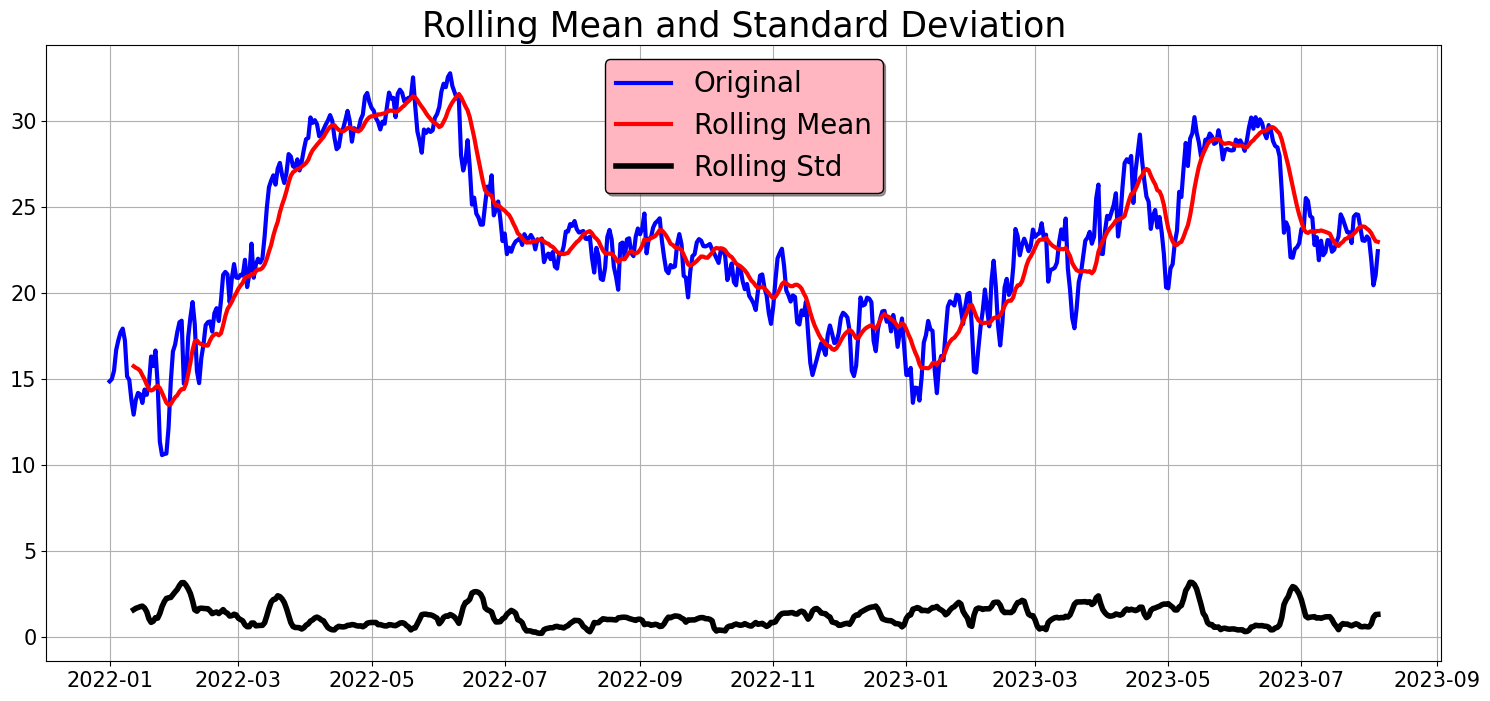

Results of dickey fuller test
Test Statistics                 -2.534927
p-value                          0.107206
No. of lags used                 3.000000
Number of observations used    578.000000
critical value (1%)             -3.441714
critical value (5%)             -2.866553
critical value (10%)            -2.569440
dtype: float64


In [56]:
test_stationarity(data['temperature_2m (°C)'])

In [57]:
# pvalue > 0.05 so we accept null hypothesis , so the data is non stationary. to make stationary we need to apply differencing

In [58]:
df_temp=data[['temperature_2m (°C)']]


In [59]:
df_temp_diff1=df_temp.diff()

In [60]:
df_temp_diff1.isnull().sum()

temperature_2m (°C)    1
dtype: int64

In [61]:
df_temp_diff1.dropna(inplace=True)

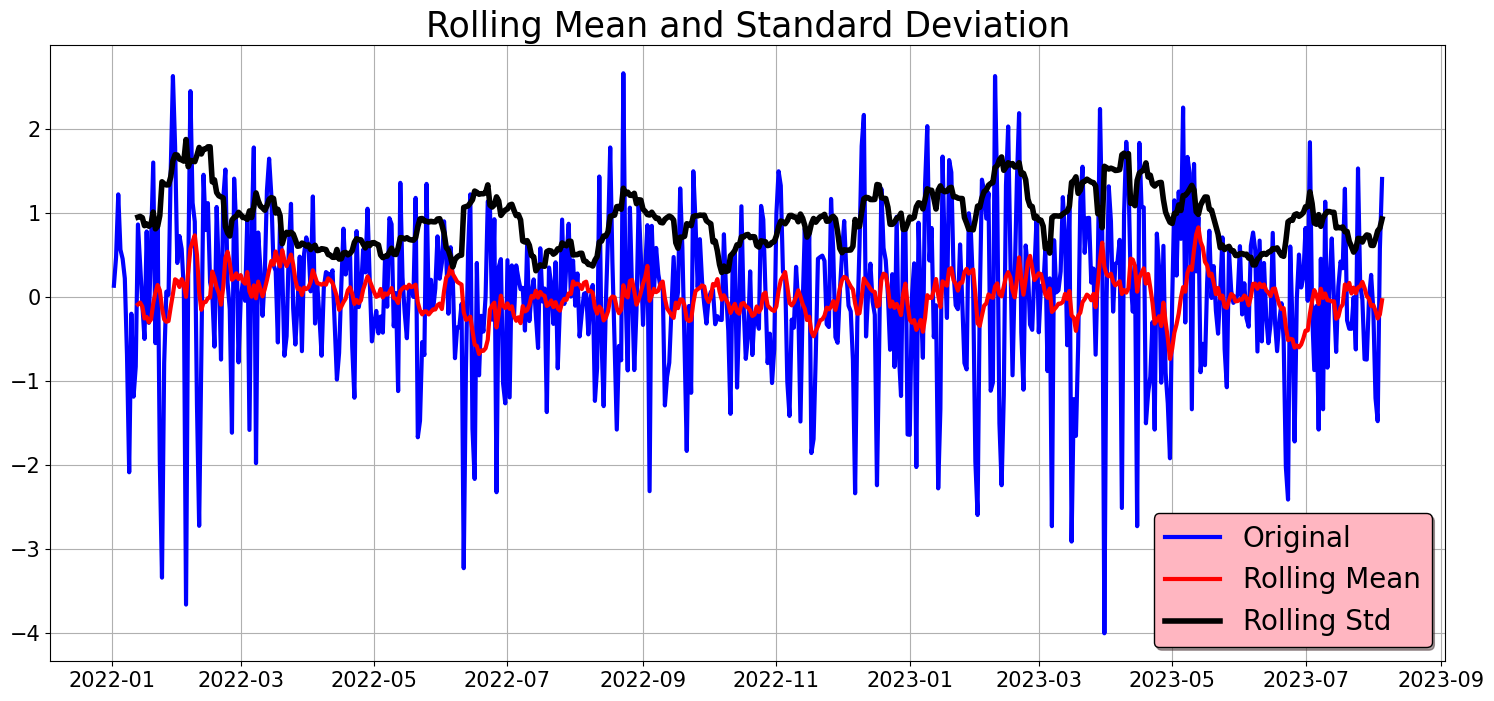

Results of dickey fuller test
Test Statistics               -1.214318e+01
p-value                        1.633182e-22
No. of lags used               5.000000e+00
Number of observations used    5.750000e+02
critical value (1%)           -3.441774e+00
critical value (5%)           -2.866580e+00
critical value (10%)          -2.569454e+00
dtype: float64


In [62]:
# Plot the tsla Adj Close 1st order difference
test_stationarity(df_temp_diff1)

In [63]:
df_temp.head()

,temperature_2m (°C)
time,
2022-01-01,14.862500
2022-01-02,14.995833
2022-01-03,15.466667
2022-01-04,16.687500
2022-01-05,17.250000


In [64]:
df_temp.shape

(582, 1)

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [66]:
result=seasonal_decompose(df_temp,period=30)

<Figure size 2000x1000 with 0 Axes>

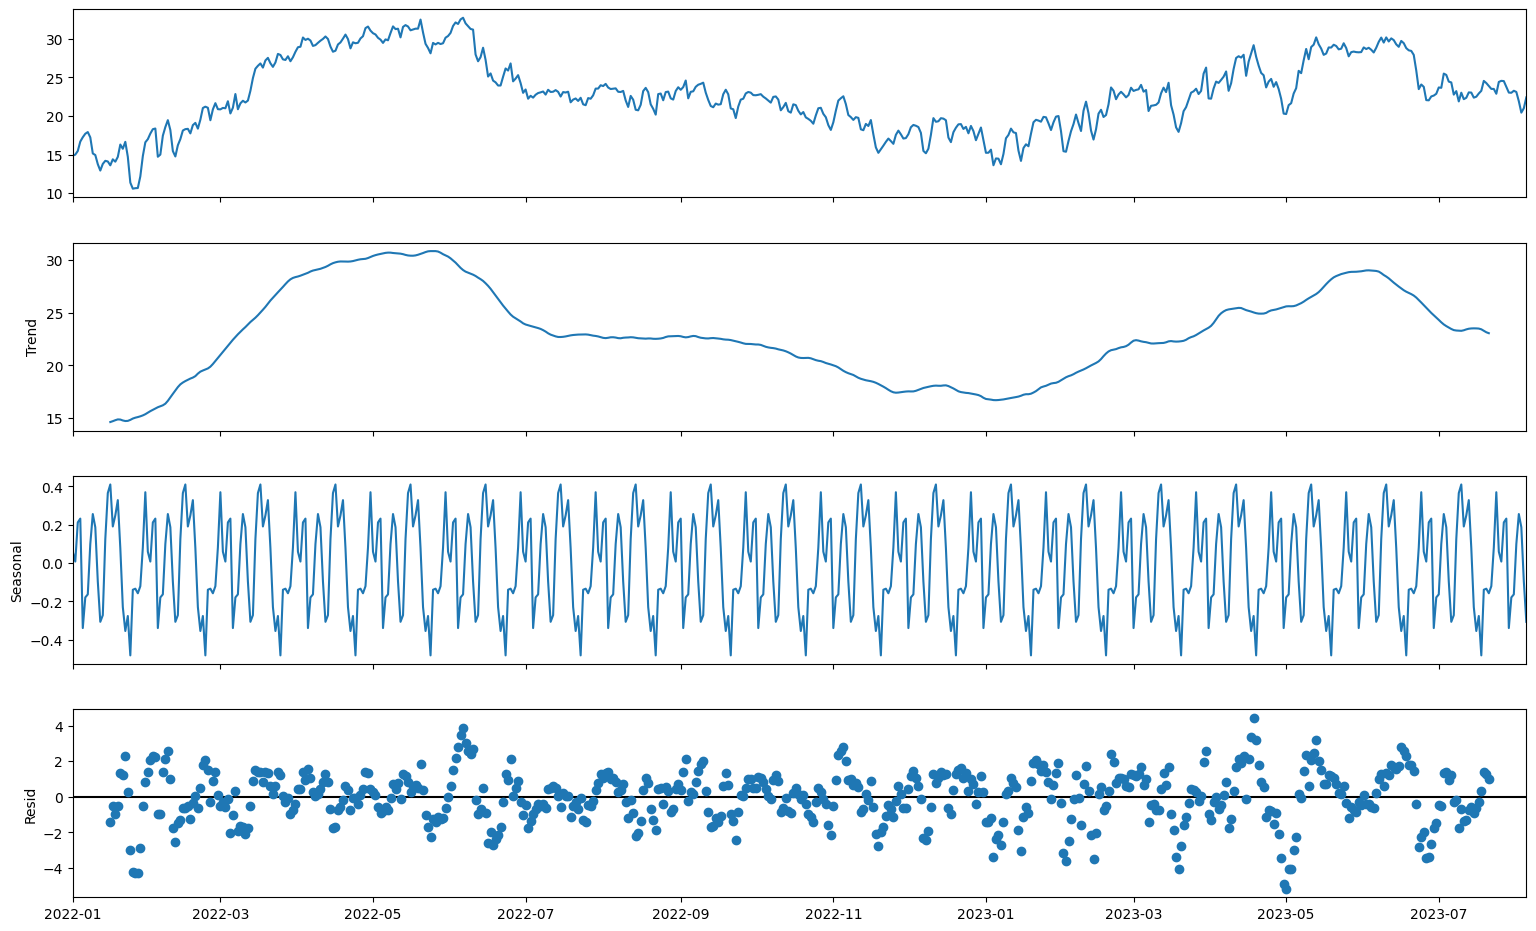

In [67]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [68]:
result1=seasonal_decompose(df_temp_diff1,period=30)

<Figure size 2000x1000 with 0 Axes>

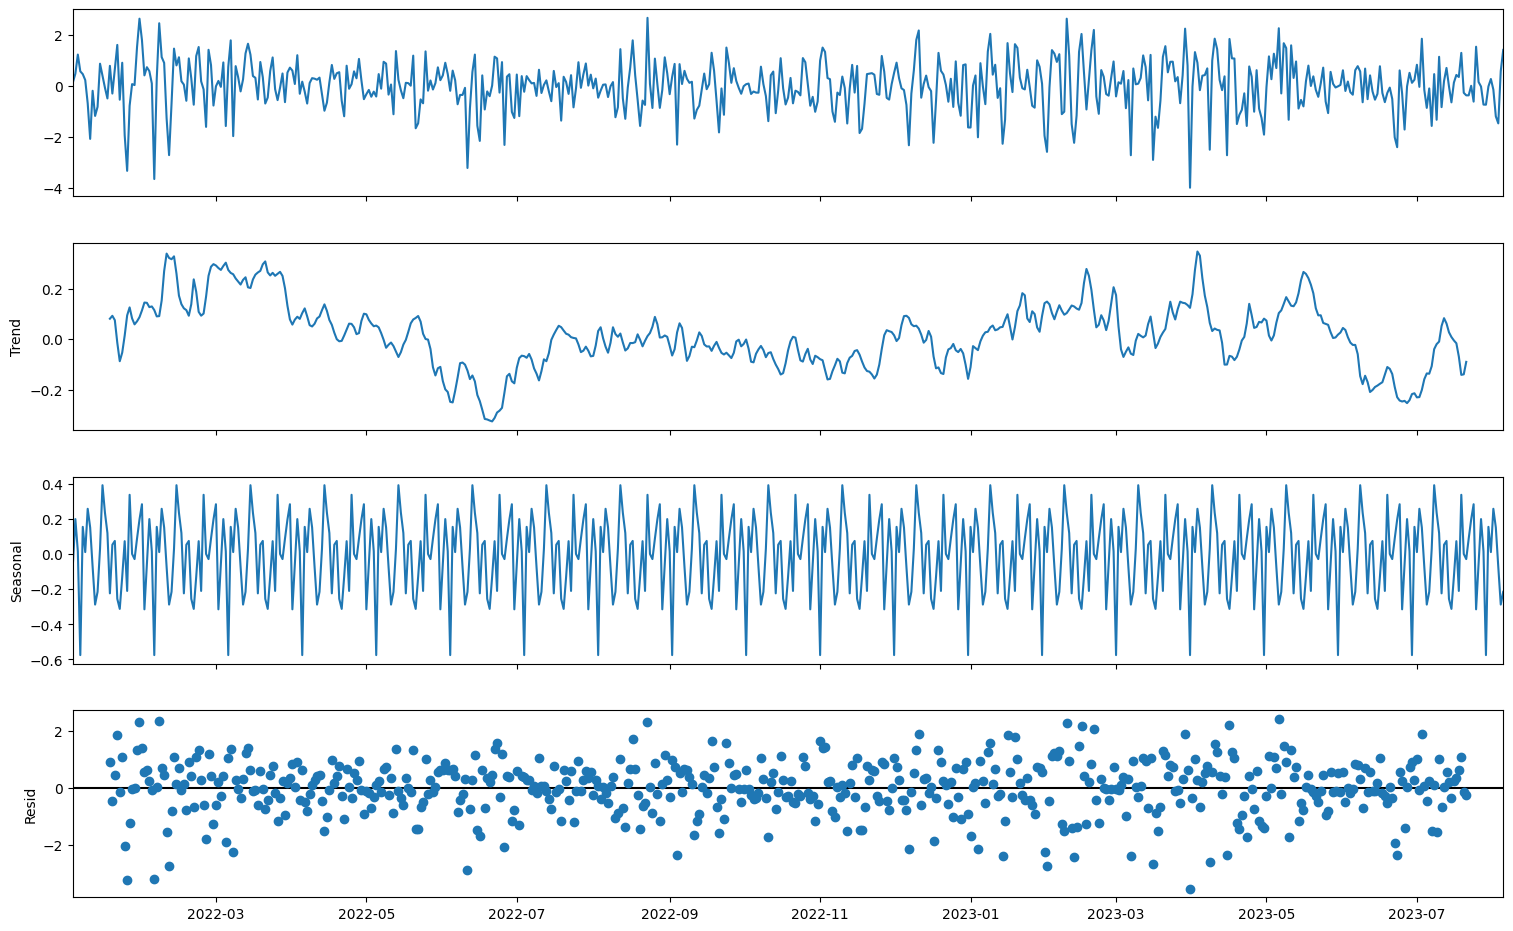

In [69]:
fig=plt.figure(figsize=(20,10))
fig=result1.plot()
fig.set_size_inches(17,10)

In [70]:
df_temp.shape

(582, 1)

In [71]:
#Train test split
total_data_points = len(df_temp)
train_ratio = 0.8 

split_index = int(total_data_points * train_ratio)
train_data = df_temp[:split_index]
test_data = df_temp[split_index:]

In [72]:
train_data.shape

(465, 1)

In [73]:
test_data.shape

(117, 1)

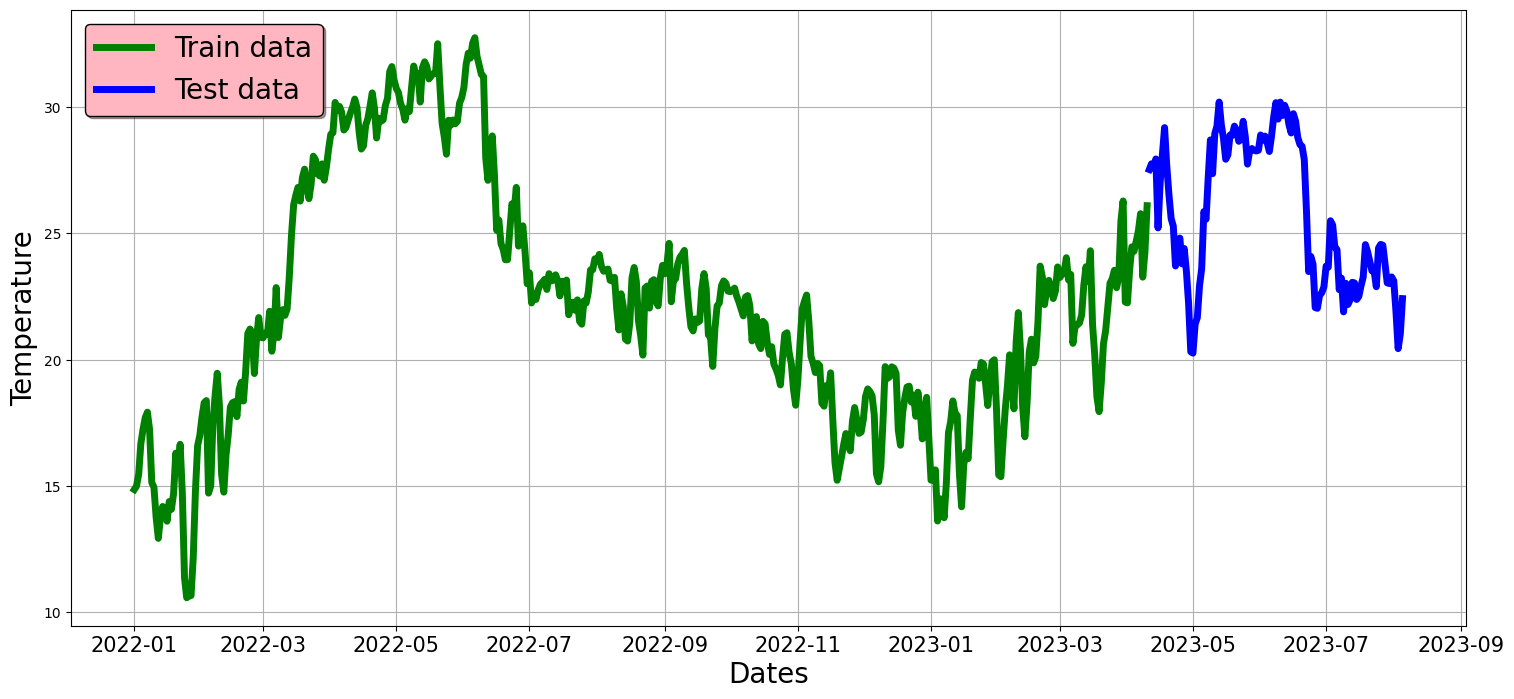

In [74]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Temperature', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [75]:
# ACF & PACF PLOT

In [76]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

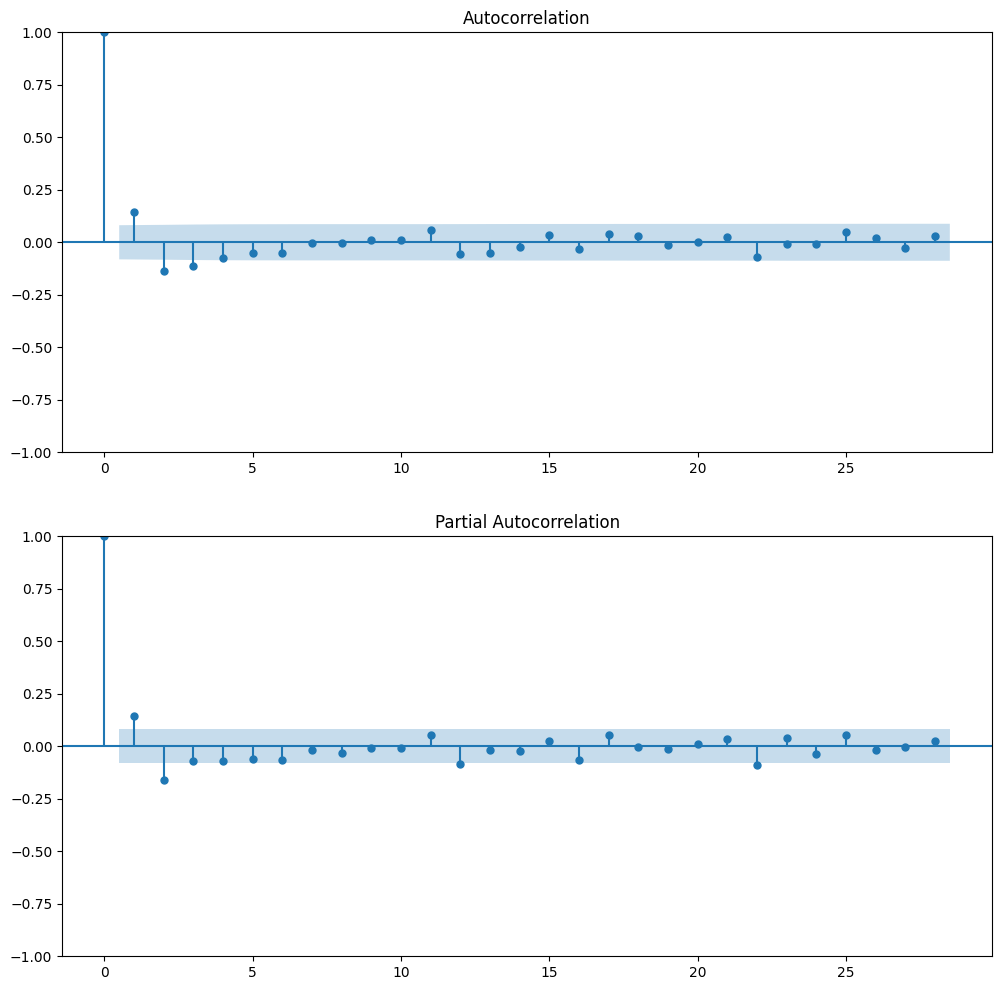

In [77]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_temp_diff1, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_temp_diff1, ax=ax2)

In [78]:
# consider p=2,q=1 and d=1

In [79]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [82]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

predicted=26.380979, expected=27.533333
predicted=27.399175, expected=27.758333
predicted=27.266058, expected=27.583333
predicted=27.137000, expected=27.950000
predicted=27.740891, expected=25.220833
predicted=24.546627, expected=27.054167
predicted=27.623615, expected=28.125000
predicted=28.157431, expected=29.191667
predicted=29.053131, expected=27.687500
predicted=27.071938, expected=26.541667
predicted=26.381021, expected=25.591667
predicted=25.678744, expected=25.291667
predicted=25.590500, expected=23.712500
predicted=23.792593, expected=24.466667
predicted=25.089043, expected=24.816667
predicted=25.100240, expected=23.795833
predicted=23.759747, expected=24.404167
predicted=24.754081, expected=23.504167
predicted=23.463687, expected=22.237500
predicted=22.287347, expected=20.316667
predicted=20.431890, expected=20.262500
predicted=20.885020, expected=21.412500
predicted=22.039515, expected=21.666667
predicted=21.813213, expected=22.920833
predicted=23.140482, expected=23.612500


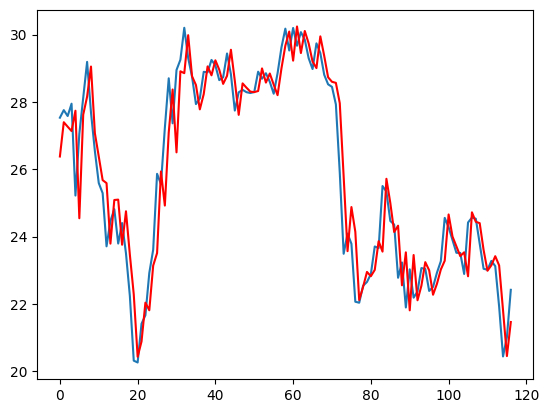

In [83]:
train_data2 = train_data.values
test_data2 = test_data.values

history = [x for x in train_data2]
predictions = list()
#  validation
for t in range(len(test_data2)):
 model = ARIMA(history, order=(2,1,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test_data2[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test_data2, predictions))
print('Test RMSE: %.3f' % rmse)

plt.plot(test_data2)
plt.plot(predictions, color='red')
plt.show()

In [86]:

forecast_steps =5  
predictions = model_fit.forecast(steps=forecast_steps)
last_date = test_data.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_steps, freq=test_data.index.freq)
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted_Value': predictions})
print(forecast_df)

        Date  Forecasted_Value
0 2023-08-05         21.464209
1 2023-08-06         21.714725
2 2023-08-07         21.824373
3 2023-08-08         21.859073
4 2023-08-09         21.862665


In [ ]:

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
train_data2 = train_data1.values
test_data2 = test_data1.values

# Create the SARIMAX model
model = SARIMAX(train_data2, order=(2, 1, 1), seasonal_order=(1, 1, 1, 30))
model_fit = model.fit()

# Forecast the same number of steps as the length of the test data
forecast_steps = len(test_data2)
output = model_fit.forecast(steps=forecast_steps)

# Calculate RMSE
rmse = sqrt(mean_squared_error(test_data2, output))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 3.634


In [87]:

# Convert your data to numpy arrays
target_dates = ['2023-08-15', '2023-08-16', '2023-08-18','2023-08-19','2023-08-20'] 
target_dates = pd.to_datetime(target_dates)
predictions = model_fit.forecast(steps=len(target_dates))
forecast_df = pd.DataFrame({'Date': target_dates, 'Forecasted_Value': predictions})
print(forecast_df)

        Date  Forecasted_Value
0 2023-08-15         21.464209
1 2023-08-16         21.714725
2 2023-08-18         21.824373
3 2023-08-19         21.859073
4 2023-08-20         21.862665


In [ ]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    
    # calculate error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                        print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))



# # evaluate parameters
# p_values = [0, 1, 2, 4, 6, 8, 10]
# d_values = range(0, 3)
# q_values = range(0, 3)
# warnings.filterwarnings("ignore")
# evaluate_models(df_temp.values, p_values, d_values, q_values)

ARIMA(0, 0, 1) RMSE=2.189
ARIMA(0, 0, 2) RMSE=1.935
ARIMA(0, 1, 0) RMSE=1.065


ARIMA(0, 1, 2) RMSE=1.058


In [ ]:
# ARIMA Predicts better thann SARIMAX, so we go for ARIMA Model